In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.tseries.offsets import MonthEnd
import datetime as dt
from statsmodels.iolib.summary2 import summary_col #to summarize multiple regressions in one table
import itertools

In [2]:
p25 = pd.read_csv('25_Porfolio.csv')
ff3 = pd.read_csv('3 factor.csv')
#updated the field name of Year&month field
p25.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff3.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff3['month'] = pd.to_datetime(ff3['YYMM'], format="%Y%m") + MonthEnd(1)
p25['month'] = pd.to_datetime(p25['YYMM'], format="%Y%m") + MonthEnd(1)
p25 = p25.set_index('month')
ff3 = ff3.set_index('month')
p25 = p25.drop('YYMM', axis=1)
ff3 = ff3.drop('YYMM', axis=1)

p25_excess = p25.sub(ff3.RF, axis=0)
ff3 = ff3.drop('RF', axis = 1)

In [3]:
ff3.index = pd.to_datetime(ff3.index)
p25.index = pd.to_datetime(p25.index)

In [79]:
p25e = p25_excess.copy()

In [106]:
#index=['ME1','ME2','ME3','ME4','ME5'], columns=['BM1','BM2','BM3','BM4','BM5']
arrays = [['ME1','ME2','ME3','ME4','ME5'], ['BM1','BM2','BM3','BM4','BM5']]
tuples = list(zip(*arrays))

In [ ]:
list(itertools.product(*arrays))

In [80]:
p25e.columns = pd.MultiIndex.from_tuples(list(itertools.product(*arrays)), names=['MktCap', 'Book2Mkt'])

In [89]:
p25e1 = p25e.stack().stack()

In [95]:
p25e1.columns = ['ret']

In [99]:
p25e2 = p25e1.reset_index()

In [104]:
p25e2.groupby(['Book2Mkt'])['ret'].mean()

Book2Mkt
BM1    0.664066
BM2    0.788332
BM3    0.891813
BM4    0.968196
BM5    1.133093
Name: ret, dtype: float64

In [103]:
p25e2.groupby(['MktCap'])['ret'].mean()

MktCap
ME1    0.955625
ME2    0.966903
ME3    0.937816
ME4    0.868977
ME5    0.716179
Name: ret, dtype: float64

In [105]:
ff3.head()

,Mkt-RF,SMB,HML
month,,,
1926-07-31,2.96,-2.30,-2.87
1926-08-31,2.64,-1.40,4.19
1926-09-30,0.36,-1.32,0.01
1926-10-31,-3.24,0.04,0.51
1926-11-30,2.53,-0.20,-0.35


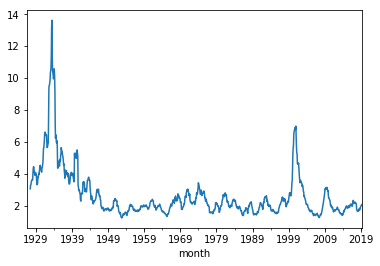

In [8]:
# variations of the returns for the 25 portfolios overtime.
p25.std(1).rolling(12).mean().plot()

In [ ]:
x = ff3[(ff3.index<=dt.datetime(1990,12,31)) & (ff3.index>=dt.datetime(1963,7,1))]
x = sm.add_constant(x)
y = p25_excess[(p25_excess.index<=dt.datetime(1990,12,31)) & (p25_excess.index>=dt.datetime(1963,7,1))]

In [12]:
#run OLS regessions for 25 porfolios in a loop
models = []
for i in range (25):
    reg = sm.OLS(y.iloc[:, i], x)
    models.append(reg.fit())

In [56]:
#summarize the 25 regression ouputs into one table
info_dict={'R-squared' : lambda x: "{}".format(round(x.rsquared,4)),
           'No. observations' : lambda x: '{}'.format(int(x.nobs), 'd')}

In [32]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [57]:
#summarize the regression output of Small-size portfolios

for i in chunks(models, 5):
    results_table_0 = summary_col(results= i,
                                stars = True,
                                float_format ="%.2f",
                                info_dict = info_dict
                               )

    results_table_0.add_title('Table - Small Size - OLS Regressions')

    print(results_table_0)

             Table - Small Size - OLS Regressions
                 SMALL LoBM ME1 BM2 ME1 BM3 ME1 BM4 SMALL HiBM
--------------------------------------------------------------
const            -0.38***   -0.09   -0.08   0.09    0.06      
                 (0.11)     (0.08)  (0.07)  (0.06)  (0.07)    
Mkt-RF           1.05***    0.97*** 0.94*** 0.89*** 0.95***   
                 (0.03)     (0.02)  (0.02)  (0.02)  (0.02)    
SMB              1.39***    1.27*** 1.15*** 1.10*** 1.19***   
                 (0.04)     (0.03)  (0.02)  (0.02)  (0.02)    
HML              -0.30***   0.08**  0.26*** 0.38*** 0.62***   
                 (0.04)     (0.03)  (0.03)  (0.03)  (0.03)    
R-squared        0.9405     0.9582  0.9649  0.9647  0.9641    
No. observations 330        330     330     330     330       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
          Table - Small Size - OLS Regressions
                 ME2 BM1  ME2 BM2 ME2 BM3 ME2 BM4 ME2 BM5
------------------------------